## Question 2.

Accuracy: 0.5
Confusion Matrix:
[[2 0 1]
 [3 1 2]
 [2 2 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.33      0.17      0.22         6
           2       0.70      0.64      0.67        11

    accuracy                           0.50        20
   macro avg       0.44      0.49      0.43        20
weighted avg       0.53      0.50      0.49        20



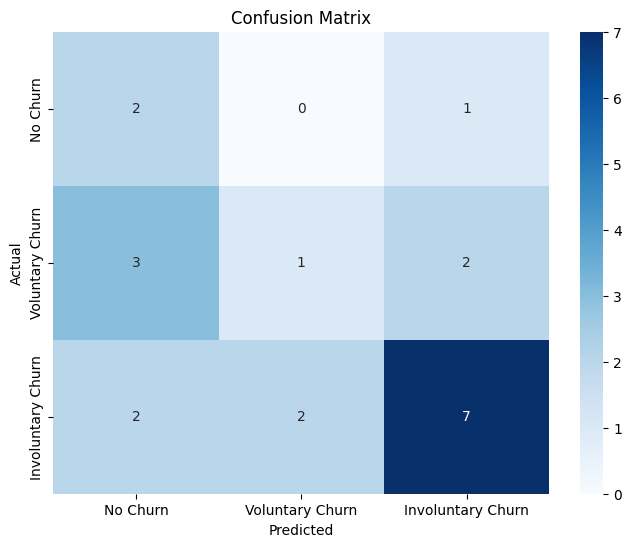

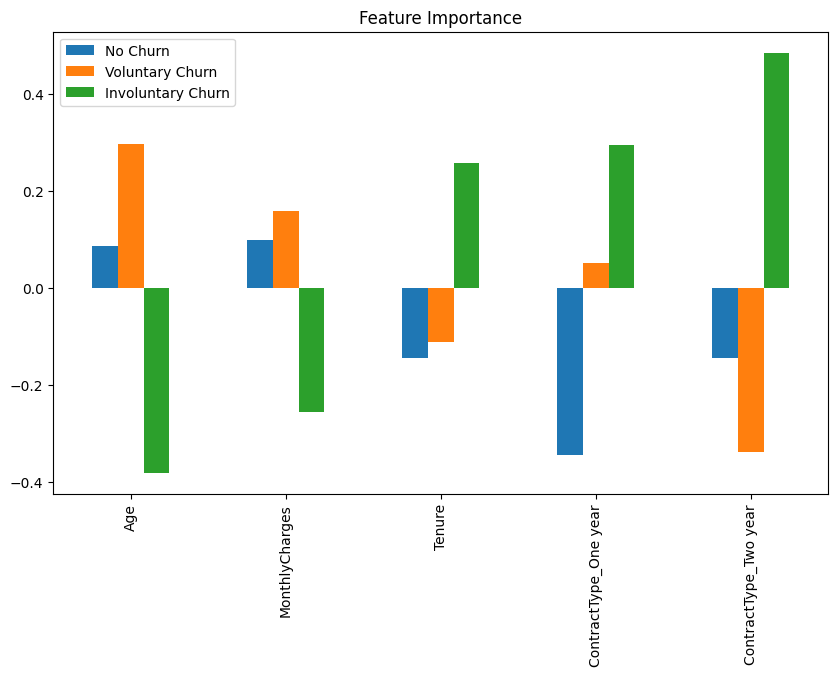

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creating dataset
data = {
    'Age': np.random.randint(18, 90, size=100),
    'MonthlyCharges': np.random.uniform(30, 120, size=100),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=100),
    'Tenure': np.random.randint(0, 72, size=100),
    'Churn': np.random.choice(['No Churn', 'Voluntary Churn', 'Involuntary Churn'], size=100)
}
df = pd.DataFrame(data)

# Normalize continuous features
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()
df['Tenure'] = (df['Tenure'] - df['Tenure'].mean()) / df['Tenure'].std()

# Convert ContractType to dummy variables
df = pd.get_dummies(df, columns=['ContractType'], drop_first=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'No Churn': 0, 'Voluntary Churn': 1, 'Involuntary Churn': 2})

# Split dataset into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Voluntary Churn', 'Involuntary Churn'], yticklabels=['No Churn', 'Voluntary Churn', 'Involuntary Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualizing feature importance
coefficients = pd.DataFrame(model.coef_.T, X.columns, columns=['No Churn', 'Voluntary Churn', 'Involuntary Churn'])
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa09a8a7-e5ce-491c-83d3-526f85db1462' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>